# Decision Trees in scikit-learn
Using the `DecisionTreeClassifier` in scikit-learn.  

In [1]:
import pandas as pd
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier, export_graphviz
apears = pd.read_csv('ApplesPears.csv')
apears.head()

,Greeness,Height,Width,Taste,Weight,H/W,Class
0,210,60,62,Sweet,186,0.97,Apple
1,220,70,53,Sweet,180,1.32,Pear
2,215,55,50,Tart,152,1.10,Apple
3,180,76,40,Sweet,152,1.90,Pear
4,220,68,45,Sweet,153,1.51,Pear


scikit-learn can deal with a category class label but it cannot deal with category features.  
So we drop the `Taste` feature. 

In [2]:
y = apears.pop('Class').values
apears.pop('Taste')    # Can't deal with category features
ap_features = apears.columns
X = apears.values
X[0]

array([210.  ,  60.  ,  62.  , 186.  ,   0.97])

In [3]:
y

array(['Apple', 'Pear', 'Apple', 'Pear', 'Pear', 'Apple', 'Pear', 'Apple',
       'Apple', 'Apple'], dtype=object)

In [4]:
tree = DecisionTreeClassifier(criterion='entropy')
ap_tree = tree.fit(X, y)

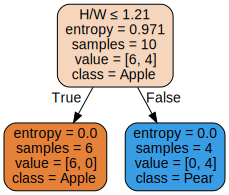

In [5]:
# Use BOTH 'conda install graphviz' and 'pip install graphviz'
tree_ap = export_graphviz(ap_tree, out_file=None, 
                      feature_names=ap_features,
                      class_names=['Apple','Pear'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = Source(tree_ap)  
graph

In [6]:
apears.pop('H/W')    # Delete this feature to make it harder
X = apears.values
ap_features = apears.columns

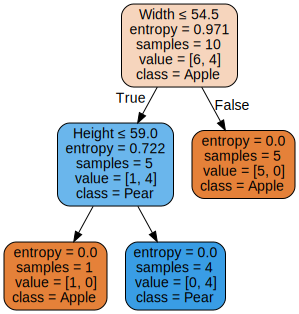

In [7]:
ap2_tree = tree.fit(X, y)
tree_ap = export_graphviz(ap2_tree, out_file=None, 
                      feature_names=ap_features,
                      class_names=['Apple','Pear'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = Source(tree_ap)  
graph

---
## Iris Data
Sklearn contains a few builtin datasets - datasets are loaded into an object (iris here).  
Changing the `min_samples_leaf` attribute will change the *bushiness* of the tree. 
Two key methods:
1. `fit` method will train the tree from the data.
2. `predict` method will produce class predictions for an array of test data. 

In [8]:
from sklearn.datasets import load_iris
from graphviz import Source
from IPython.display import SVG

iris = load_iris()
tree = DecisionTreeClassifier(criterion='entropy',
                              min_samples_leaf=10
                            )
i_tree = tree.fit(iris.data, iris.target)

In [9]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [10]:
i_tree # Have a look at the model attributes

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

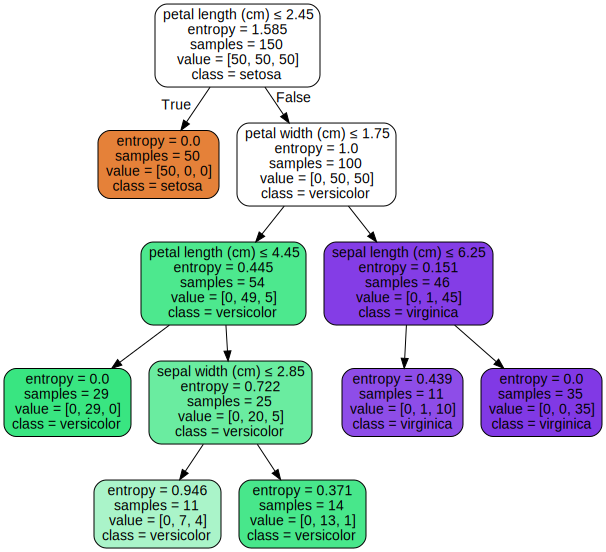

In [11]:
# Use BOTH 'conda install graphviz' and 'pip install graphviz'
tree_im = export_graphviz(i_tree, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = Source(tree_im)  
graph

Run a test example.

In [12]:
tn = 55
for i,j in zip(iris.data[tn],iris.feature_names):
    print(i,j)
y_pred = i_tree.predict([iris.data[tn]])
print('Prediced class No:',y_pred[0])
print('Prediced class label:',iris.target_names[y_pred[0]])

5.7 sepal length (cm)
2.8 sepal width (cm)
4.5 petal length (cm)
1.3 petal width (cm)
Prediced class No: 1
Prediced class label: versicolor


***
   ## Athlete Data

In [13]:
import pandas as pd
athlete = pd.read_csv('AthleteSelection.csv',index_col = 'Athlete')
athlete.head()

,Speed,Agility,Selected
Athlete,,,
x1,2.50,6.00,0
x2,3.75,8.00,0
x3,2.25,5.50,0
x4,3.25,8.25,0
x5,2.75,7.50,0


In [14]:
y = athlete.pop('Selected').values
X = athlete.values

In [15]:
atree = DecisionTreeClassifier(criterion='entropy')
atree = tree.fit(X,y)

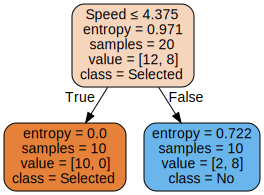

In [16]:
dot_data = export_graphviz(atree, out_file=None, 
                      feature_names=['Speed','Agility'],  
                      class_names=['Selected','No'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = Source(dot_data)  
graph

## Restaurant Data
Predictive features are categories(rather than numeric).

In [17]:
import pandas as pd
restaurant = pd.read_csv('restaurant.csv',index_col = 'No')
restaurant.head()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEst,WillWait?
No,,,,,,,,,,,
1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
4,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


## Aside: Dealing with category data
Convert to numeric - two options:  
1. `get_dummies` method for pandas.
2. `OneHotEncoding` for sklearn. 

In [18]:
df = pd.DataFrame({'Pet': ['cat', 'dog', 'cat','ferret'], 
                   'Transport': ['bike', 'car', 'car','bike'],
                   'Gender': ['Female','Female','Male','Female']})
df

,Pet,Transport,Gender
0,cat,bike,Female
1,dog,car,Female
2,cat,car,Male
3,ferret,bike,Female


### Pandas `get_dummies`
The Pandas `get_dummies` method is the easiest way to do One-Hot encoding.  
But if you want to apply the encoding to a test file later, this gets awkward. 

In [19]:
pd.get_dummies(df)

,Pet_cat,Pet_dog,Pet_ferret,Transport_bike,Transport_car,Gender_Female,Gender_Male
0,1,0,0,1,0,1,0
1,0,1,0,0,1,1,0
2,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0


In [20]:
pd.get_dummies(df,drop_first=True)

,Pet_dog,Pet_ferret,Transport_car,Gender_Male
0,0,0,0,0
1,1,0,1,0
2,0,0,1,1
3,0,1,0,0


### Using `OneHotEncoder` to convert category features to numbers

In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
onehot_encoder = OneHotEncoder(sparse=False)
dfOH = onehot_encoder.fit_transform(df)
dfOH

array([[1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0.]])

In [22]:
onehot_encoder.get_feature_names()

array(['x0_cat', 'x0_dog', 'x0_ferret', 'x1_bike', 'x1_car', 'x2_Female',
       'x2_Male'], dtype=object)

In [23]:
onehot_encoder.categories_

[array(['cat', 'dog', 'ferret'], dtype=object),
 array(['bike', 'car'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

### `LabelEncoder` also converts category features to numbers
This is more compact.  
But it is not exactly what we want as the numbers are misleading.  
Ferrets are not more like dogs than cats. (Well maybe they are!)

In [24]:
# LabelEncoder only works on single columns so we must 'apply' it to the dataframe. 
label_encoder = LabelEncoder()
labelE = df.apply(label_encoder.fit_transform)
labelE

,Pet,Transport,Gender
0,0,0,0
1,1,1,0
2,0,1,1
3,2,0,0


---
# Restaurant Data 
## Using OneHotEncoding
`OneHotEncoder` class has two key methods:   
1. `fit` to 'learn' the transform from the data,
2. `transform` to apply the OneHot transform to the data, the transform can be applied to other (e.g. test) datasets.


In [25]:
restaurant = pd.read_csv('restaurant.csv',index_col = 'No')
y = restaurant.pop('WillWait?').values
X = restaurant.values
X[:3,]

array([['Yes', 'No', 'No', 'Yes', 'Some', '$$$', 'No', 'Yes', 'French',
        '0-10'],
       ['Yes', 'No', 'No', 'Yes', 'Full', '$', 'No', 'No', 'Thai',
        '30-60'],
       ['No', 'Yes', 'No', 'No', 'Some', '$', 'No', 'No', 'Burger',
        '0-10']], dtype=object)

In [26]:
onehot_encoder = OneHotEncoder(sparse=False)  # We can add drop='first'
restOH = onehot_encoder.fit(restaurant)
restOH_data = restOH.transform(restaurant)

In [27]:
restaurant.columns

Index(['Alternate', 'Bar', 'Fri/Sat', 'Hungry', 'Patrons', 'Price', 'Raining',
       'Reservation', 'Type', 'WaitEst'],
      dtype='object')

In [28]:
restOH.get_feature_names(restaurant.columns)

array(['Alternate_No', 'Alternate_Yes', 'Bar_No', 'Bar_Yes', 'Fri/Sat_No',
       'Fri/Sat_Yes', 'Hungry_No', 'Hungry_Yes', 'Patrons_Full',
       'Patrons_None', 'Patrons_Some', 'Price_$', 'Price_$$', 'Price_$$$',
       'Raining_No', 'Raining_Yes', 'Reservation_No', 'Reservation_Yes',
       'Type_Burger', 'Type_French', 'Type_Italian', 'Type_Thai',
       'WaitEst_0-10', 'WaitEst_10-30', 'WaitEst_30-60', 'WaitEst_>60'],
      dtype=object)

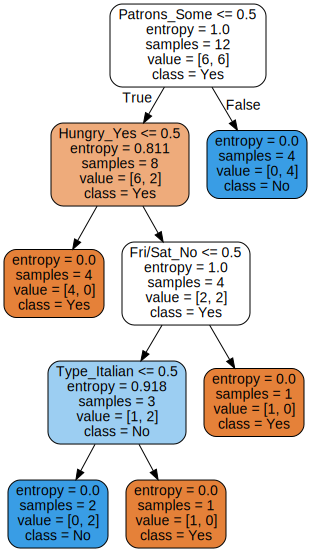

In [29]:
rtree = DecisionTreeClassifier(criterion='entropy')
rtreeOH = rtree.fit(restOH_data,y)

dot_data = export_graphviz(rtreeOH, 
                      feature_names=restOH.get_feature_names(restaurant.columns),
                      class_names=['Yes','No'], 
                      filled=True, rounded=True,  
                      out_file=None) 
graph = Source(dot_data) 
graph

## Encoding Restaurant data using `get_dummies`

In [30]:
rest1 = pd.get_dummies(restaurant,drop_first=False)
rest2 = pd.get_dummies(restaurant,drop_first=True)

In [31]:
rest1.head()

,Alternate_No,Alternate_Yes,Bar_No,Bar_Yes,Fri/Sat_No,Fri/Sat_Yes,Hungry_No,Hungry_Yes,Patrons_Full,Patrons_None,...,Reservation_No,Reservation_Yes,Type_Burger,Type_French,Type_Italian,Type_Thai,WaitEst_0-10,WaitEst_10-30,WaitEst_30-60,WaitEst_>60
No,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
2,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
3,1,0,0,1,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,0,1,1,0,0,1,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
5,0,1,1,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [32]:
rest2.head()

,Alternate_Yes,Bar_Yes,Fri/Sat_Yes,Hungry_Yes,Patrons_None,Patrons_Some,Price_$$,Price_$$$,Raining_Yes,Reservation_Yes,Type_French,Type_Italian,Type_Thai,WaitEst_10-30,WaitEst_30-60,WaitEst_>60
No,,,,,,,,,,,,,,,,
1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0
5,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1


In [33]:
X = rest1.values

In [34]:
rtree1 = DecisionTreeClassifier(criterion='entropy')
rtree1.fit(rest1,y) # fit method can be called directly on the data frame
rtree1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

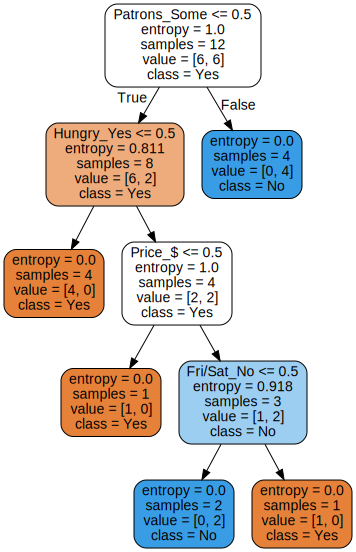

In [35]:
import graphviz 
dot_data = export_graphviz(rtree1, 
                      feature_names=rest1.columns,
                      class_names=['Yes','No'], 
                      filled=True, rounded=True,  
                      out_file=None) 
graph = graphviz.Source(dot_data) 
graph

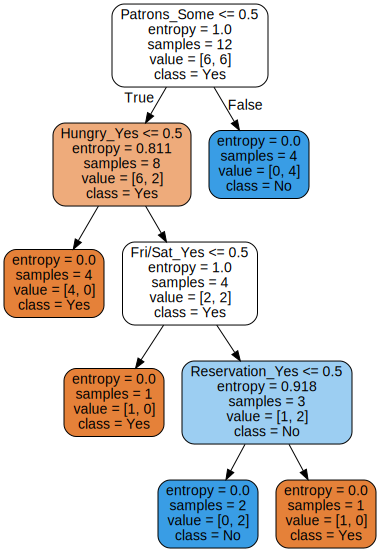

In [36]:
rtree2 = DecisionTreeClassifier(criterion='entropy')
X2 = rest2.values
rtree2.fit(X2,y)

dot_data = export_graphviz(rtree2, 
                      feature_names=rest2.columns,
                      class_names=['Yes','No'], 
                      filled=True, rounded=True,  
                      out_file=None) 
graph = graphviz.Source(dot_data) 
graph